Step 1: 
Use Python to scrape data for the top 50 solar flares shown in SpaceWeatherLive.com. Steps to do this are:

1. pip install or conda install the following Python packages: beautifulsoup4, requests, pandas, numpy, lxml
Note: There is a bit of an issue using Docker. The easiest way around this is to manually install lxml when
you start the notebook server. You can either add the command !pip3 install lxml into your notebook or in 
the Notebook window open a termainl window and run the same command in the terminal.
Note you’ll have to do this each time you (re)start Docker.

In [1]:
!pip3 install lxml

     |████████████████████████████████| 5.4 MB 2.2 MB/s eta 0:00:01     |████████████████████████████████| 5.4 MB 2.2 MB/s 


In [2]:
!pip3 install beautifulsoup4

In [3]:
!pip3 install requests

In [4]:
!pip3 install pandas

In [5]:
!pip3 install numpy

In [6]:
!pip install html5lib

     |████████████████████████████████| 112 kB 1.4 MB/s eta 0:00:01


2. Use requests to get (as in, HTTP GET) the URL. 
Hint: Since last time, the website has installed some measures, as talked about in class, 
to keep us from accessing the site. Check the HTML Return Code, what does it mean? 
Have a look at the response.text that came back, what does it say? We can add a few things to our Requests Headder, 
Maybe try something like this, to trick the server into thinking you’re human, but don’t tell anyone :-).

In [7]:
!pip3 install fake-useragent
from fake_useragent import UserAgent
import requests

#creates an agent and header to scrape the HTML data from the website provied
ua = UserAgent()
header = {'User-Agent':str(ua.chrome)}
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
htmlContent = requests.get(url, headers=header)



  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13486 sha256=bf0182eec2e0338f5c429df0bb074863783f5a79022a0e781e85cafd6ce8fded
  Stored in directory: /home/jovyan/.cache/pip/wheels/a0/b8/b7/8c942b2c5be5158b874a88195116b05ad124bac795f6665e65
Successfully built fake-useragent


3. Extract the text from the page.

In [8]:
#saves text into varaible
text = htmlContent.text

4. Use BeautifulSoup to read and parse the data, either as html or lxml.

In [9]:
from bs4 import BeautifulSoup

#parses text
data = BeautifulSoup(text, 'html.parser')

5. Use prettify() to view the content and find the appropriate table.

In [10]:
#prettifys the text
data.prettify()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <title>\n   Top 50 solar flares | Solar activity | SpaceWeatherLive.com\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>\n  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>\n  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>\n  <!-- Facebook meta -->\n  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares" property="og:url"/>\n  <meta content="article" property="og:type"/>\n  <meta conte

6. Use find() to save the aforementioned table as a variable.

In [11]:
#finds table 
table = data.find("table")


7. Use pandas to read in the HTML file.
Hint: make-sure the above data is properly typecast and check the return type for the pandas function!
Hint: Maybe checkout the Pandas read_html() function

In [12]:
import pandas as pd
import html5lib

#creates datetable from file
df = pd.read_html(str(table))[0]

8. Set reasonable names for the table columns, e.g., rank, x_classification, date, region, 
start_time, maximum_time, end_time, movie. pandas.
DataFrame.columns makes this very simple.

In [13]:
#renanes columns
df.columns = ['rank','x_classification', 'date', 'region',
           'start_time', 'maximum_time', 'end_time', 'movie']

df

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


Step 2:
1. Drop the last column of the table, since we are not going to use it moving forward.

In [14]:
#deltes movies column
del df ['movie']

2. Use the datetime library (you need to import it) to combine the date and each of the three time columns into three datetime columns. You will see why this is useful later on.
Pandas iterrows() should prove useful here.
Make sure to check the dtype of the column when you are done! Pandas to_datetime comes in useful here.
Hint: Check out the Pandas to_datetime function for some help!

3. Update the values in the dataframe as you do this. The Pandas function .at should prove useful.

In [15]:
import datetime

#Changegs date to proper format
df['date'] = pd.to_datetime(df['date']).dt.date

#changes times to proper format
for i in ['start_time', 'maximum_time', 'end_time']: 
    df[i] = pd.to_datetime(df[i]).dt.time
    df[i] =  df['date'].map(str) + ' ' + df[i].map(str)


4. Set regions coded as - as missing (np.nan). You can use dataframe.replace() here.
Note: There may be none of these, look at your data!

In [16]:
#did not need to do, but wrote code to show we knew how
#df['region'].replace('-', 'np.nan')

5. Re-arrange the columns and drop the date as shown below.
Hint Pandas rename function and Pandas drop function.

In [17]:
#dropped date column
del df['date']

#rearranged the coluumns
df = df[['rank', 'x_classification', 'start_time', 'maximum_time', 'end_time', 'region']]

In [18]:
df

,rank,x_classification,start_time,maximum_time,end_time,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


Step 3:
1. Use BeautifulSoup functions (e.g., find, findAll) and string functions (e.g., python str.split and built-in array slicing capabilities) to obtain each row of data as a long string.

In [46]:
#creates an agent to scrape the HTML data from the website provied
ua2 = UserAgent()
header2 = {'User-Agent':str(ua2.chrome)}
NASA = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
NASAContent = requests.get(NASA, headers=header2)

#creates text of data from website
NASAtext = NASAContent.text

#cleans texts, and removes all links
cleantext = BeautifulSoup(NASAtext, "lxml").text

#splits the text into a list of strings seprated by line breaks
NASAstrings = cleantext.splitlines()

#takes out unnessary strings from list
NASAstrings = NASAstrings[15:-2]

#creates list of list of data 
NASAlist = []
for i in NASAstrings:
    NASAlist.append(i.split())

2. Use str.split and list comprehensions or similar to separate each line of text into a data row. Choose appropriate names for columns.
Hint: Try using regular expressions like we did in class to remove the links around the numbers if possible before parsing the records. Also recall how to make a DataFrame from a list of dicts!
Hint: It can be awfully handy to have a python regular expression checker around.
Alt. Hint: You may also want to look into the Beautiful Soup get_text method.

3. Create a DataFrame of the information you have so far. You can drop the column with links to the plots.

In [47]:
#creates dataframe from list of list created above
NASA = pd.DataFrame(NASAlist)

#drops unnessary columns that were created due to notes left in the table
NASA.drop(NASA.columns[14:],axis=1,inplace=True)

#set column names
NASA.columns = ['start_date','start_time', 'end_date', 'end_time',
           'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'importance','cme_date',
            'cme_time', 'cpa', 'width', 'speed']

NASA

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,cme_date,cme_time,cpa,width,speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


Step 4:
Now, we tidy up the NASA table. Here we will code missing observations properly, recode columns that correspond to more than one piece of information, and treat dates and times appropriately.

1. Recode any missing entries in each column! as np.nan. Refer to the data description in http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm (and above) to see how missing entries are encoded in each column. Be sure to look carefully at the actual data, as the nasa descriptions might not be completely accurate. Be sure to use numpy.nan to set these correctly.
Hint: Use try using Pandas unique to check for offending values.
Hint: For flare_location, Back is an okay designation but should be consistent. For flare_region “FILA” or “DSF” are coded for disappearing solar filament, make these consistently FILA.

In [48]:
#imports numpy package
import numpy as np

#replaces all empty information with NaNs in repective columns 
for i in ['flare_location', 'flare_region', 'importance',  'cpa', 'cme_date', 'cme_time', 'width', 'speed']:
    NASA[i] = NASA[i].map( lambda x: np.nan
                          if x in ['------', '-----', '----', '---','--/--', '--:--'] else x)

#creates a consistency with the 'Back'
NASA['flare_location'] = NASA['flare_location'].map(lambda x: 'BACK' if x in ['Back', 'Back?'] else x)

#replaces DSF with FILA
NASA['flare_region'] = NASA['flare_region'].map(lambda x: 'FILA' if x== 'DSF' else x)

2. The CPA column (cme_angle) contains angles in degrees for most rows, except for halo flares, which are coded as Halo. Create a new column that indicates if a row corresponds to a halo flare or not, and then replace Halo entries in the cme_angle column as np.nan.

In [49]:
#creates new column Halo to indicate wheather there was a Halo flare or not
NASA["Halo"] = NASA['cpa'].map({
    'Halo': True
})

NASA['Halo'].fillna(False, inplace=True)

In [50]:
#replaces Halos with NaN
NASA['cpa'] = NASA['cpa'].map( lambda x: np.nan if x == 'Halo' else x)

3. The width column indicates if the given value is a lower bound. Create a new column that indicates if width is given as a lower bound, and remove any non-numeric part of the width column.
Hint: There may be nan’s here, try Pandas isnull to parse the rows properly.

In [51]:
#creates column 'lower bound'
NASA["lower_bound"] = NASA['width'].map(lambda x: True if '>' in str(x) else False)

#removes all > from width column 
NASA['width'].replace('>', '', regex=True, inplace=True)

4. Combine date and time columns for start, end and cme so they can be encoded as datetime objects.
Note: You may use the start year for the end year and cme year.
Note: You may need to convert some times to be 23:59 instead of 24:00

In [52]:
#replaces all times
for i in ['start_time', 'end_time', 'cme_time']:
    NASA[i] = NASA[i].map(lambda x: "23:59" if x in ['00:00', '24:00'] else x)

#creates year column
NASA['year'] = pd.DatetimeIndex(NASA['start_date']).year

#adds year to end and cme date since they do not have a year
NASA['end_date'] = NASA['end_date'] + '/' + NASA['year'].map(str)
NASA['cme_date'] = NASA['cme_date'] + '/' + NASA ['year'].map(str)

for i in ['start_date','end_date', 'cme_date']:
    NASA[i] = pd.to_datetime(NASA[i], yearfirst=True).dt.date

#converts start_time and end_time to datetime format
for i in ['start_time', 'end_time']:
    NASA[i] = pd.to_datetime(NASA[i]).dt.time

#converts cme_time to date time format
for i in NASA['cme_time']:
    if pd.isnull(i) == False:
       i = pd.to_datetime(i).time

#NASA['cme_time'] = NASA['cme_time'].dt.strftime('%y-%m-%d %H:%M:%S')

#combines date & time into one column
NASA['start_time'] =  NASA['start_date'].map(str) + ' ' + NASA['start_time'].map(str)
NASA['end_time'] =  NASA['end_date'].map(str) + ' ' + NASA['end_time'].map(str)
NASA['cme_time'] =  NASA['cme_date'].map(str) + ' ' + NASA['cme_time'].map(str)

5. Once you have cleaned the table, make sure the types of the columns are correct (numeric columns should be numeric, objects objects, datetimes should be datetimes) and drop any unecessary columns.

In [53]:
del NASA['start_date'], NASA['end_date'], NASA['cme_date'], NASA['year']

In [54]:
NASA

,start_time,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,cme_time,cpa,width,speed,Halo,lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27,NaN,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30,NaN,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12,NaN,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24,NaN,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00,NaN,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03,124,96,252,False,False


Question 1:
Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?

Include code used to get the top 50 solar flares from the NASA table (be careful when ordering by classification, remember x is the highest!). Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.


Hint: You can modify the NASA dataframe slightly to do this if you wish.

Hint: You’re going to want to use some date/time indexing functions.

In [55]:
pd.options.mode.chained_assignment = None

#converts all objects in the importance column to strings
NASA['importance'].map(str)

#rearanges data fram by importance
NASA.sort_values('importance', ascending=False, inplace=True)

#creates new dataframe with same colums as Spaceweatherlive.com 
replicate = NASA[['start_time', 'end_time', 'importance', 'cme_time', 'flare_region', 'Halo']]

#keeps the top 50 rows
replicate = replicate.iloc[0:50].reset_index()

#creates new column 'new' 
number = list(range(5,55))
replicate['new'] = number

#changes values in 'new' column
top = ['X28.', 'X20.', 'X17.', 'X14.' , 'X10.']
x = 0
for i in range(len(replicate)) : 
      if replicate.loc[i, "importance"] in top:
            replicate.loc[i, "new"] = x
            x += 1

#sorts values by 'new' column
replicate.sort_values('new', inplace=True)

#resets index to match 
replicate.reset_index(inplace=True)

#drops unnecessary columns
del replicate['new'], replicate['index'], replicate['level_0']

#renames columns to match Spaceweatherlive.com 
replicate.columns = ['start_time', 'end_time', 'x_classification', 'maximum_time', 'region', 'Halo']

#creates new column rank
number = list(range(1,51))
replicate['rank'] = number

#need this dataframe question 3 of the analysis, not part of question 1 answer 
NASA_halo = replicate[['rank', 'x_classification', 'start_time', 'maximum_time', 'end_time', 'region', 'Halo']]
NASA_halo[0:5].replace('\.','+', inplace=True, regex=True)

#reaarange columns to match
replicate = replicate[['rank', 'x_classification', 'start_time', 'maximum_time', 'end_time', 'region']]


#changes '.' at end of x_classifications to '+'
replicate[0:5].replace('\.','+', inplace=True, regex=True)

replicate

,rank,x_classification,start_time,maximum_time,end_time,region
0,1,X28+,2003-11-04 20:00:00,2003-11-04 19:54,2003-11-04 23:59:00,10486
1,2,X20+,2001-04-02 22:05:00,2001-04-02 22:06,2001-04-03 02:30:00,9393
2,3,X17+,2003-10-28 11:10:00,2003-10-28 11:30,2003-10-29 23:59:00,10486
3,4,X14+,2001-04-15 14:05:00,2001-04-15 14:06,2001-04-16 13:00:00,9415
4,5,X10+,2003-10-29 20:55:00,2003-10-29 20:54,2003-10-29 23:59:00,10486
5,6,X9.4,1997-11-06 12:20:00,1997-11-06 12:10,1997-11-07 08:30:00,8100
6,7,X9.3,2017-09-06 12:05:00,2017-09-06 12:24,2017-09-07 08:00:00,12673
7,8,X9.0,2006-12-05 10:50:00,NaT nan,2006-12-05 20:00:00,10930
8,9,X8.3,2017-09-10 16:02:00,2017-09-10 16:00,2017-09-11 06:50:00,NaN
9,10,X8.3,2003-11-02 17:30:00,2003-11-02 17:30,2003-11-03 01:00:00,10486


In [56]:
'''When attempting to duplicate the SpaceWeatherLive.com table, we realized that the NASA data did not have some of 
same flares. Also some of the information on the NASA data frame was different, such as some of the flare locations 
added a 10 to the front, or there was no time'''

'When attempting to duplicate the SpaceWeatherLive.com table, we realized that the NASA data did not have some of \nsame flares. Also some of the information on the NASA data frame was different, such as some of the flare locations \nadded a 10 to the front, or there was no time'

Question 2: Integration (15 pts)
Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data and assigns a rank value to that entry in the NASA table. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares.

Hint: You may want to look at multiple pieces of data before deciding if a flare matches.

In your submission, include an explanation of how you are defining best matching rows across the two datasets in addition to the code used to find the best matches.

Use your function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, if it appears in that dataset.

Hint: You may not end up with all the ranks!

At the end of this section display only flares in the NASA table that you could rank.

In [57]:
#drops the seconds from both dataframss since they do not mach 
times = ['start_time', 'end_time', 'maximum_time']
for i in times:   
    NASA_halo[i] = NASA_halo[i].str.split(' ', expand=True)
    df[i] = df[i].str.split(' ', expand=True)


#merges both dataframes to find overlapping flares
common = ['x_classification', 'start_time']
inner = pd.merge(df, NASA_halo, on=common, how='inner',suffixes=('', '_NASA'))

#drops columns we didnt use to find overlapping
del inner['maximum_time_NASA'], inner['end_time_NASA'], inner['rank_NASA'], inner['region_NASA']

inner

,rank,x_classification,start_time,maximum_time,end_time,region,Halo
0,1,X28+,2003-11-04,2003-11-04,2003-11-04,486,True
1,2,X20+,2001-04-02,2001-04-02,2001-04-02,9393,False
2,7,X9.4,1997-11-06,1997-11-06,1997-11-06,8100,True
3,8,X9.3,2017-09-06,2017-09-06,2017-09-06,2673,True
4,10,X8.3,2003-11-02,2003-11-02,2003-11-02,486,True
5,12,X7.1,2005-01-20,2005-01-20,2005-01-20,720,True
6,13,X6.9,2011-08-09,2011-08-09,2011-08-09,1263,True
7,14,X6.5,2006-12-06,2006-12-06,2006-12-06,930,False
8,15,X6.2,2005-09-09,2005-09-09,2005-09-09,808,True
9,17,X5.7,2000-07-14,2000-07-14,2000-07-14,9077,True


In [58]:
'''We decided that rows with matching x_classifications and start times were the best matching enteries. We took
off seconds because none of the seconds matched, and we did not use the other columns (end_time, maximum_time, region)
because they were off by a bit. We used our NASA_halo dataframe to help with question 3'''

'We decided that rows with matching x_classifications and start times were the best matching enteries. We took\noff seconds because none of the seconds matched, and we did not use the other columns (end_time, maximum_time, region)\nbecause they were off by a bit. We used our NASA_halo dataframe to help with question 3'

Question 3: Analysis Plot (15 pts)
Note: From here on we are only referring to the top 50 that you were able to match in the NASA data.

Prepare one plot that shows the top 50 solar flares that you were able to match in context with all data available in the NASA dataset. Here are some possibilities (you can do something else). Helpful ideas are also in the Pandas Visualization Docs.

Do flares in the top 50 tend to have Flare Halo CMEs? You can make a bar or pie plot that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole.


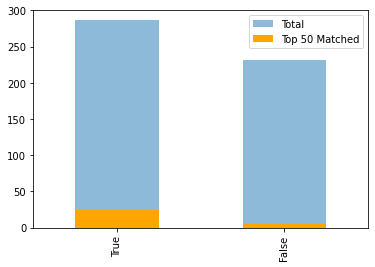

In [95]:
#creates bar graph of the amount of Halo Flares in the top 50 we were able to match and the total flares in the NASA dataframe
NASA['Halo'].value_counts().plot.bar(alpha=.5, legend=True, label= "Total")

inner['Halo'].value_counts().plot.bar(color= 'Orange', legend=True, label= "Top 50 Matched")

In [97]:
'''Our plot shows the amount of Halo Flares. The orange bars come from the 50 flares we were able to match, 
while the blue bar shows all the flares from the NASA data. The distribution of true vs. false shows that the top 50
flares have a larger percentage of Halos than not, while all the flares have a closer to 50/50 relationship.'''

'Our plot shows the amount of Halo Flares. The orange bars come from the 50 flares we were able to match, \nwhile the blue bar shows all the flares from the NASA data. The distribution of true vs. false shows that the top 50\nflares have a larger percentage of Halos than not, while all the flares have a closer to 50/50 relationship.'